## Представлены данные об оттоке клиентов некоторого банка. 

In [1]:
import pandas as pd

churn_data = pd.read_csv('C:/Users/ilyad/IDE/study/python_13/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## ЗАДАНИЯ

* 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

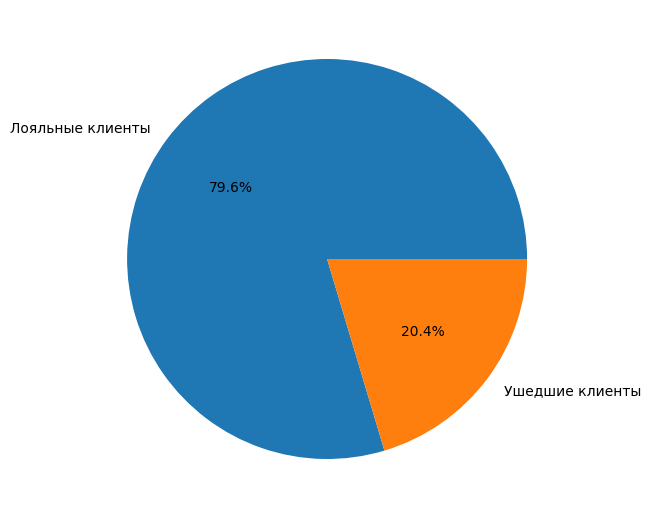

In [59]:
Exited = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    Exited,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
    explode = [0, 0]
);

### Вывод: По данным об оттоке клиентов некоторого банка на графике видно значительное преобладание лояльных клиентов по отношению к ушедшим клиентам, причём перевес почти в 3 раза.

* 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

* 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

* 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

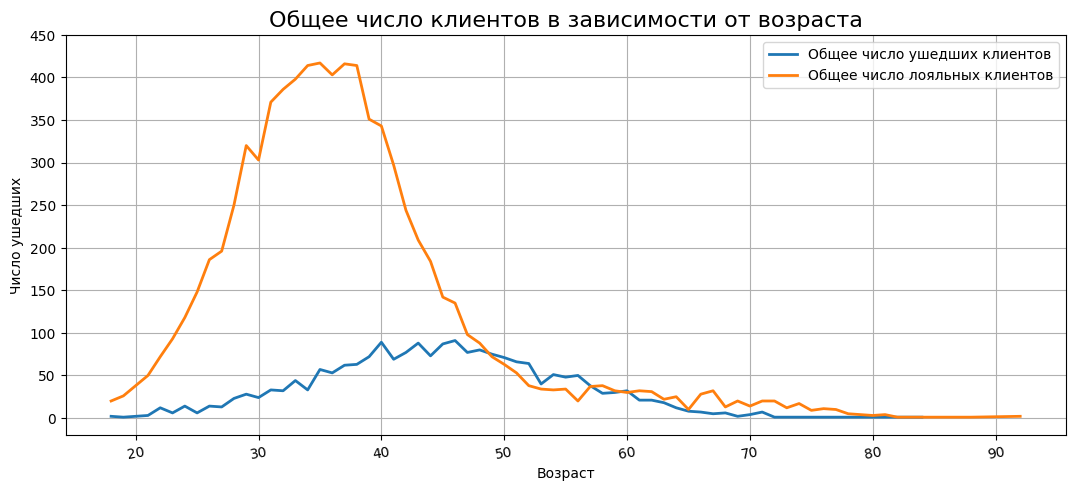

In [93]:
age_data_1 = churn_data[churn_data['Exited'] == 1]
age_grouped_1 = age_data_1.groupby(['Age'])[['Exited']].sum()
age_data_0 = churn_data[churn_data['Exited'] == 0]
age_grouped_0 = age_data_0.groupby(['Age'])[['Exited']].count()
#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(age_grouped_1['Exited'], label='Общее число ушедших клиентов', lw=2)
axes.plot(age_grouped_0['Exited'], label='Общее число лояльных клиентов', lw=2)

#установка параметров отображения
axes.set_title('Общее число клиентов в зависимости от возраста', fontsize=16)
axes.set_xlabel('Возраст')
axes.set_ylabel('Число ушедших клиентов')
axes.set_yticks(range(0, 500, 50))
axes.xaxis.set_tick_params(rotation=10)
axes.grid()
axes.legend();

* 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

* 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
###### Подсказка: Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

In [90]:
share_departed_customers_gender = churn_data.pivot_table(
    values='Exited',
    index='Gender',
)
display(share_departed_customers_gender)


,Exited
Gender,
Female,0.250715
Male,0.164559


* 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

* 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

* 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [33]:
import seaborn as sns
print(sns.__version__)

0.13.2


In [64]:
share_departed_customers_country = churn_data.groupby(by = 'Geography')['Exited'].mean()
display(share_departed_customers_country)

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

* 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

    Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

    На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [ ]:
'''
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
'''